# Engineered Prompt: Autowrite An Essay About State-of-the-Art Machine Learning Meta Using ArXiv Meta Data 

In this prompted essay a meta API query will serve as a filter for query selection. This is a meta analysis of meta analyses about machine learning so let's write a few different queries related to machine learning meta studies. We can add more queried data later and build upon the topic-at-hand to broaden the scope of the essay or fine-tune a model to suit our needs. The plan is to make sure the final output essay text contains information about technologies that have been recently published. We then need to know how good the essay is by comparison. To what? If it leaves out a crucial component that would make the difference between a well researched piece and something obviously written by a machine or a neophyte it won't be very useful to research. 

SPECTER is a pre-trained model for classification and recommendation of scientific papers built on transformers.[1] This is what we want to be told to use if we prompt our chosen essay writing model about the task of building *it* or about recent machine learning research developments and important in-the-know scientific results based on complex meta data summarization. However, we need the model to write about the previous two years of journal articles for our meta analysis and SPECTER is out-of-date since its publication. 

Hugging Face has alienai/specter2 which is the most recent version of SPECTER. We can play with the ["bleeding edge"](http://huggingface.co/docs/transformers/installation) of Hugging Face as follows:

In [1]:
# pip install peft - not compatible with adapters lib 

In [2]:
# pip install evaluate 

In [3]:
pip install "dill==0.3.1.1" "cmudict==1.0.2" "scipy==1.8.0" "importlib-metadata==6.0" "numpy==1.23.4" "shapely==2.0" 'pymc3==3.11.0' "sentence-transformers" "accelerate>=0.20.3"

  Using cached dill-0.3.1.1.tar.gz (151 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cmudict-1.0.2-py2.py3-none-any.whl.metadata (3.7 kB)
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement scipy==1.8.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0

In [4]:
# pip install git+https://github.com/huggingface/transformers

In [5]:
pip install --upgrade huggingface_hub

  Using cached huggingface_hub-1.2.3-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-1.2.3-py3-none-any.whl (520 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:
      Successfully uninstalled huggingface-hub-0.36.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.51.3 requires huggingface-hub<1.0,>=0.30.0, but you have huggingface-hub 1.2.3 which is incompatible.
tokenizers 0.21.4 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 1.2.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install -U adapter-transformers

  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.2.3
    Uninstalling huggingface_hub-1.2.3:
      Successfully uninstalled huggingface_hub-1.2.3
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install transformers sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install d6tflow networkx scikit-learn adapters

Note: you may need to restart the kernel to use updated packages.


In [9]:
import d6tflow 
import requests
import os
import pandas as pd 
import xml.etree.ElementTree as ET
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from operator import itemgetter
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from gensim.parsing.preprocessing import remove_stopwords
import string 
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from scipy.sparse import csr_matrix
import networkx as nx
from sentence_transformers import SentenceTransformer, util
import pickle
import json
from collections import Counter, OrderedDict
import operator
import torch
from sklearn.feature_extraction.text import CountVectorizer
from transformers import AutoTokenizer, AutoModel
from adapters import AutoAdapterModel

Loading postgres module without psycopg2 nor pg8000 installed. Will crash at runtime if postgres functionality is used.
Loading S3 module without the python package boto3. Will crash at runtime if S3 functionality is used.


Welcome to d6tflow! For Q&A see https://github.com/d6t/d6tflow


In [10]:
# Get the current date and time
now = datetime.now()
# Subtract two years
two_years_ago = now - relativedelta(years=2)
print(two_years_ago)

2023-12-28 00:11:58.141502


We'll come back to the Hugging Face transformers library after we construct some dataframes to analyze. ArXiv has a nice API to harness articles by query. These results may be slightly more up-to-date than the official competion article meta dataset. This is "the bleeding edge" anyhow. This notebook is not competing in the current Kaggle essay contest. 

What have we done so far? 

The two things to focus attention on are the libraries for Hugging Face and d6tflow. 

In [11]:
query_words = ['machine', 'learning', 'meta', 'data']
queries = [word + '&' for word in query_words]
query = ''.join(queries)
query_size = 3000
url = f'https://export.arxiv.org/api/query?search_query=all:{query}start=0&max_results={query_size}'
print(url)
word = query_words[:2]
word = ' '.join(word)
print(word)

https://export.arxiv.org/api/query?search_query=all:machine&learning&meta&data&start=0&max_results=3000
machine learning


Now, we can get the meta data from the articles about our query for our query of terms from our url. Let's find articles from within the past two years. For our task management there is a very useful package to leverage machine learning pipelining and data science workflows called d6tflow.
The search query is returning 3000 results which is a managable amount for our meta use case. If you decide to run this notebook, keep in mind that obsessively researching your favorite queries is a beneficial but maybe intensive hobby. This prompt engine is very useful for understanding publication vectors for string choices that signify interest areas not too broad and not too narrow. 


In [12]:
data = requests.get(url).text

Saving a dict object to a pickle with a d6tflow task. 

In [13]:
class MetaDataTask(d6tflow.tasks.TaskPickle):
    def run(self):
        archive = dict()
        archive['url'] = url 
        archive["data"] = data
        df = {'meta': archive}
        self.save(df)
        
flow = d6tflow.Workflow()
flow.run(MetaDataTask)


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 MetaDataTask()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x130693290>,scheduling_succeeded=True)

In [14]:
class SortMetaTask(d6tflow.tasks.TaskPickle):
    def run(self):
        two_years_ago = pd.Timestamp.now(tz='UTC') - pd.DateOffset(years=2)
        df = pd.read_xml(data)
        index = pd.RangeIndex(start=0, stop=3000)
        xml_df = pd.DataFrame()
        xml_df['title'] = df['title'][7:]
        xml_df['abstract'] = df['summary'][7:]
        xml_df['published'] = df['published'][7:]
        xml_df['published'] = pd.to_datetime(df['published'])
        xml_df['updated'] = df['updated'][7:]
        xml_df['url'] = df['id'][7:]
        xml_df['two_year_date'] = xml_df['published'].apply(lambda x: 1 if x > two_years_ago else 0)
        xml_df['title_has_word'] = xml_df['title'].str.contains(f'{word}', case=False)
        xml_df['combined'] = xml_df['title'] + ' ' + xml_df['abstract']
        xml_df.index = index
        self.save(xml_df)
        
flow = d6tflow.Workflow()
flow.run(SortMetaTask)


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 SortMetaTask()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x1306c23d0>,scheduling_succeeded=True)

We now have a beautiful addition to our working directory as d6tflow automatically creates a data directory with subdiretories for each task you run that returns a saved object successfully. Our new meta data archive based on the queries we made is stored in a pickle file. 

If we save data in the data directory and file format using a d6tflow Task object and then want to delete and rerun to repopulate our data directory we will have to remove it first. Once files are saved by d6tflow they will be immutable. So, they must be deleted before any errors can be corrected. The working_directory() call will list our d6tflow created directories and files in the Kaggle working tree. The data_reset() call will wipe the data directory clean allowing a fresh rerun of all the tasks. 

In [15]:
data_dir = 'data'
def working_directory():
    for dirname, _, filenames in os.walk('/kaggle/working'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# Clear data folder

def data_reset(directory):
    for the_file in os.listdir(directory):
        file_path = os.path.join(directory, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                data_reset(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

data_path = '/kaggle/working/' + f"{data_dir}"
# data_reset(data_path)
working_directory()

In [16]:
pip freeze>requirements.txt 

Note: you may need to restart the kernel to use updated packages.


We have added a requirements.txt based on some dependency issues and we can now rerun the above cell when an update to the .txt file is needed. 

In [17]:
model = SentenceTransformer('paraphrase-albert-small-v2')
flow = d6tflow.Workflow()
df = flow.outputLoad(SortMetaTask)
print(model)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 100, 'do_lower_case': False, 'architecture': 'AlbertModel'})
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)


# **A little sentence transformer, a pickle, and a dataframe walk into a bar...**

In [18]:
class ClusterTask(d6tflow.tasks.TaskPickle):
    def run(self):
        # Generate embeddings for all titles
        embeddings = model.encode(df['title'])
        # Cluster embeddings into 5 clusters (adjust this value based on your data)
        kmeans = KMeans(n_clusters=5)
        df['cluster'] = kmeans.fit_predict(embeddings)
        grouped = df.groupby(['published', 'cluster']).size().reset_index(name='counts')
        # Create a line plot for each topic
        fig = px.scatter(grouped, x='published', y='cluster', color='cluster')
        fig.update_layout(
            title_text=f'Title Clusters For Query: {query_words}', 
            xaxis_title_text='Date', 
            yaxis_title_text=f'5 Clusters For Results', 
        )
        fig.show()
        self.save(df)
        
flow = d6tflow.Workflow()
flow.run(ClusterTask)


def count_vect():
    # Use a CountVectorizer to count word frequencies
    documents = df['title']
    labels = df['cluster']
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)

    for i in range(5):  # for each cluster
        cluster_docs = np.array(documents)[np.array(labels) == i]
        cluster_X = vectorizer.fit_transform(cluster_docs)
        word_freq = np.sum(cluster_X, axis=0)
        word_freq = np.asarray(word_freq).ravel().tolist()
        # features = cluster_X.get_feature_names()
        word_freq_df = pd.DataFrame({'frequency': word_freq})
        # print(f"Most common terms in cluster {i}:")
        print(word_freq_df.sort_values(by='frequency', ascending=False).head())
        # Get the word for each counted index
        # words = {word: counts[idx] for word, idx in X.vocabulary.items()}


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 ClusterTask()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



We can render some basic visuals from our raw data with some preprocessing. However, this is optional and the real power of this generated essay we are prompting is in SPECTER. 

Our query is visualized below with a bar graph. The articles results of our original ArXiv query words have been cleaned for word frequencies which includes punctuation removal and sorting each word by frequency. This is reusable code and any words may be substituted for the query we are currently working with for this query based prompt. 

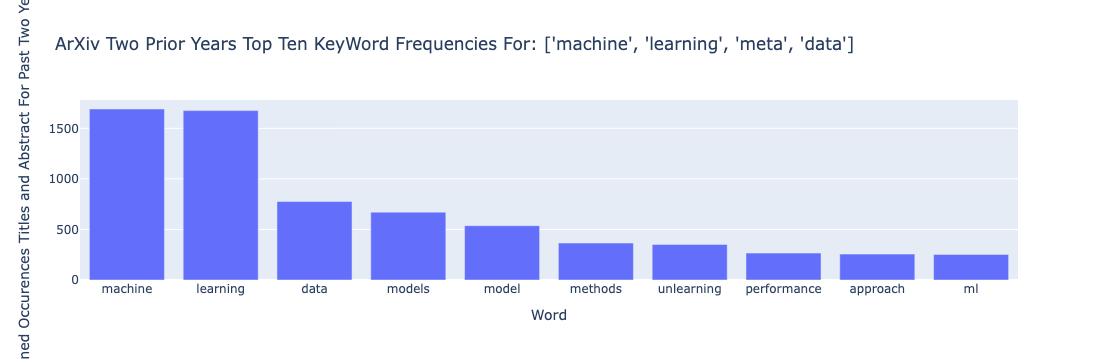


===== Luigi Execution Summary =====

Scheduled 2 tasks of which:
* 1 complete ones were encountered:
    - 1 ClusterTask()
* 1 ran successfully:
    - 1 VizMetaTask()

This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x1306a0f90>,scheduling_succeeded=True)

In [19]:
def punc_remove(text):
    # Remove punctuation 
    # text = text.translate(str.maketrans('', '', string.punctuation))
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text 

def freqs(text):
    # Convert string to list of words, count, sort in reverse 
    text = text.split()
    freq_list = [(w, text.count(w)) for w in text] 
    freq_list.sort(key=lambda w: w[1], reverse=True)
    # Duplicates removal from the list 
    l = []
    [l.append(x) for x in freq_list if x not in l]
    # Converting list of tuples into two lists
    words, frequencies = zip(*l)
    # Create a bar plot
    title_text = f'ArXiv Two Prior Years Top Ten KeyWord Frequencies For: {query_words}'
    # query_size = f'{query_size}'
    fig = px.bar(x=words[:10], y=frequencies[:10], 
                 labels={'x':'Word', 'y':f'Combined Occurences Titles and Abstract For Past Two Years'}, 
                 title=title_text)
    fig.show()
    return l 

# This will load our cached XML dataframe with five sorted columns; 0-4

class VizMetaTask(d6tflow.tasks.TaskCachePandas):
    def requires(self):
        return ClusterTask()
    
    def run(self):
        data = self.inputLoad()
        df = pd.DataFrame(data)
        df = df[df['two_year_date'] == 1]
        # Remove puntuation and stop words 
        df['combined'] = df['combined'].str.lower()
        title_text = df['title']
        abstract_text = df['abstract']
        # Calls take a single string 
        text = df['combined'].str.cat(sep=' ')
        text = punc_remove(text)
        text = remove_stopwords(text)
        # Top word frequencies in abstracts 
        abstract_freq = freqs(text)
        abstract_df = pd.DataFrame(abstract_freq)
        self.save(df)
        
flow = d6tflow.Workflow()
flow.run(VizMetaTask)

Sweet deal. 
We now have a beautiful graph of the top ten word frequencies for the prior two years ArXiv articles for the given query. 
Since this essay is ultimately an analysis of descriptive text summaries written in paragraphs let's explore the Sentence-Transformers library. There is a conversion of SPECTER to a [sentence-transformers model](http://huggingface.co/sentence-transformers/allenai-specter) which maps scientific articles to a vector space for similarity. 

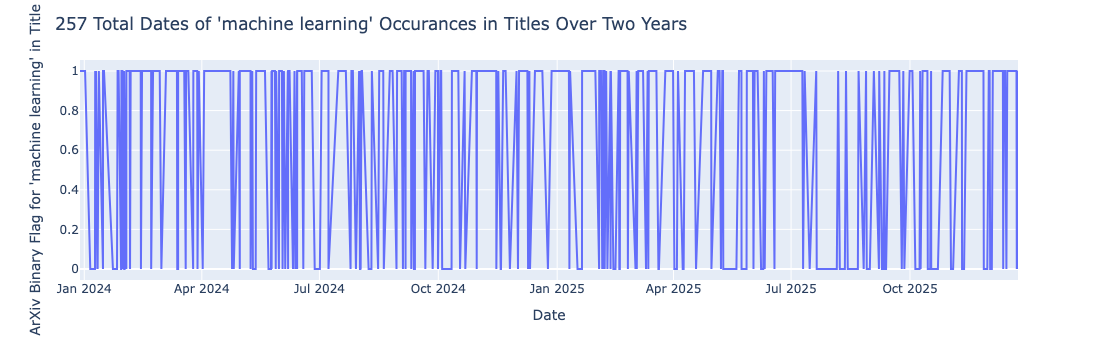

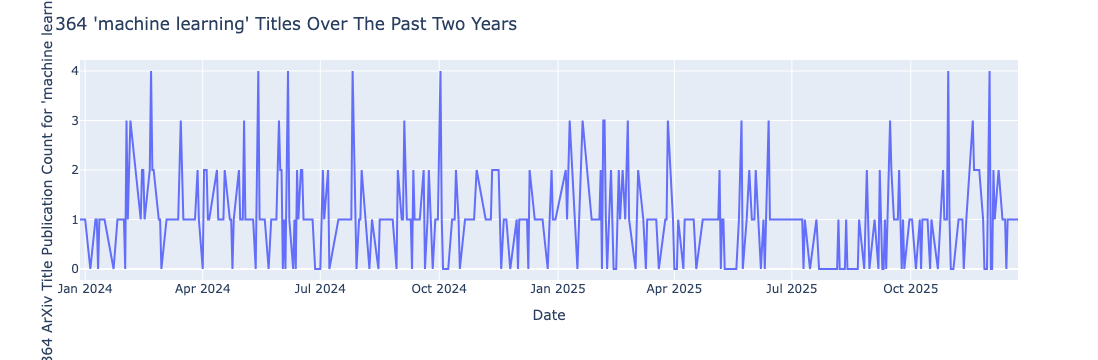

In [20]:
word = query_words[:2]
word = ' '.join(word)
df = df[df['two_year_date'] == 1]
# Binary flag indicating whether "machine learning" appears in the title
df_agg = df.groupby('published').agg({'title_has_word': 'sum'}).reset_index()
unique_dates = df[df['title_has_word'] == 1]['published'].dt.date.nunique()
# The count of titles with "machine learning" over time
count = df['title_has_word'].sum()
fig = px.line(df_agg, x='published', y='title_has_word')
fig.update_layout(
    title_text=f"{unique_dates} Total Dates of '{word}' Occurances in Titles Over Two Years", 
    xaxis_title_text='Date', 
    yaxis_title_text=f"ArXiv Binary Flag for '{word}' in Title", 
    bargap=0.2,
)
fig.show()

# Aggregate the DataFrame by date, summing up the 'title_has_word' column for each date
df_agg = df.groupby(df['published'].dt.date).agg({'title_has_word': 'sum'}).reset_index()
ml_sum = df_agg['title_has_word'].sum()
ml_sum = ml_sum.copy()
# Plot the count of titles containing 'machine learning' over time
fig = px.line(df_agg, x='published', y='title_has_word')
fig.update_layout(
    title_text=f"{ml_sum} '{word}' Titles Over The Past Two Years", 
    xaxis_title_text='Date', 
    yaxis_title_text=f"{ml_sum} ArXiv Title Publication Count for '{word}'", 
    bargap=0.2,
)
fig.show()

In [21]:
import json
import requests

url = 'https://huggingface.co/api/models'
response = requests.get(url)
models = json.loads(response.text)

specter_models = [m for m in models if 'specter' in m.get('id', '').lower()]
print(f"Found {len(specter_models)} SPECTER models:")
for model in specter_models:
    print(f"  - {model['id']}")

url = 'https://huggingface.co/api/models?search=specter'
response = requests.get(url)
models = response.json()

official = [m for m in models if m['id'].startswith('allenai/') or m['id'].startswith('alienai/')]
print(f"Found {len(official)} official SPECTER models:")
for model in official:
    print(f"  - {model['id']}")

Found 0 SPECTER models:
Found 11 official SPECTER models:
  - allenai/specter2_aug2023refresh
  - allenai/specter
  - allenai/specter2_base
  - allenai/specter2_classification
  - allenai/specter2
  - allenai/specter2_regression
  - allenai/specter2_adhoc_query
  - allenai/specter2_aug2023refresh_base
  - allenai/specter2_aug2023refresh_adhoc_query
  - allenai/specter2_aug2023refresh_classification
  - allenai/specter2_aug2023refresh_regression


In [22]:
flow = d6tflow.Workflow()
df = flow.outputLoad(SortMetaTask)
def get_item(row):
    return row[2]
def expand_df(df):
    # Needs to be sorted again 
    df['sort_key'] = df['articles'].apply(get_item)
    df.sort_values('sort_key', inplace=True)
    df.drop(columns='sort_key', inplace=True)
    df_expanded = df['articles'].apply(pd.Series)
    df_expanded.columns = ['url', 'update', 'pub date', 'title', 'abstract']
    return df_expanded

In [23]:
def xml_data(xml):
    root = ET.fromstring(xml)
    archive = {'articles': []}
    for children in root:
        for child in children[2:3]:
            archive['articles'].append([child.text for child in children[:5]])
    data = pd.DataFrame(archive)
    df = expand_df(data)
    return df

In [24]:
working_directory()

# The following embedding API - https://github.com/allenai/paper-embedding-public-apis - 
# will embed batches up to size 16 with SPECTER. 

In [25]:
URL = "https://model-apis.semanticscholar.org/specter/v1/invoke"
MAX_BATCH_SIZE = 16

def chunks(lst, chunk_size=MAX_BATCH_SIZE):
    """Splits a longer list to respect batch size"""
    for i in range(0, len(lst), chunk_size):
        yield lst[i : i + chunk_size]

PAPERS = [
    {
        "paper_id": str(row_id),
        "title": row['title'],
        "abstract": row['abstract'],
    } 
    for row_id, row in df.iterrows()
]

def embed(papers):
    embeddings_by_paper_id: Dict[str, List[float]] = {}
    for chunk in chunks(papers):
        # Allow Python requests to convert the data above to JSON
        response = requests.post(URL, json=chunk)
        if response.status_code != 200:
            raise RuntimeError("Sorry, something went wrong, please try later!")
        for paper in response.json()["preds"]:
            embeddings_by_paper_id[paper["paper_id"]] = paper["embedding"]
    return embeddings_by_paper_id

class Embeddings2Task(d6tflow.tasks.TaskPickle):
    def run(self):
        all_embeddings = embed(PAPERS)
        self.save(all_embeddings)
    
flow = d6tflow.Workflow()
flow.run(Embeddings2Task)


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 Embeddings2Task()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x134d6f090>,scheduling_succeeded=True)

There's now a very nice new .pkl and an updated .json dataset in our working tree. 

Alright, we have wrangled some very nice embeddings that can be queried for similar scientific papers with a two part query that expects a title and an abstract to search for throughout the pretrained model corpora. We can get by for now with some short descriptive text in place of a title and abstract. 

We will update our dataset for this model with our original MetaDataTask output so that we can have search results for the gap years prior to two years ago and 2018. 


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 SecondSortTask()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



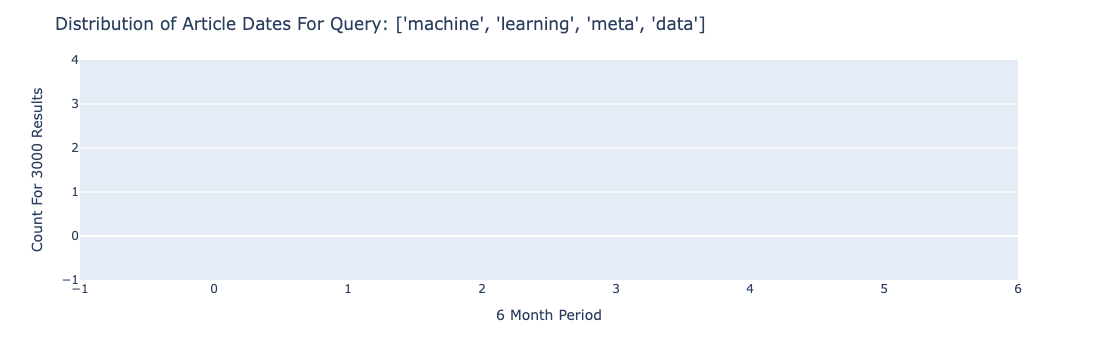

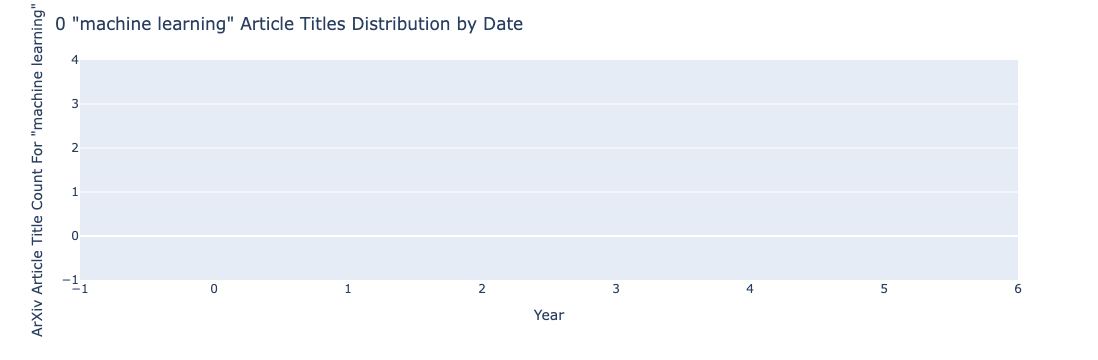

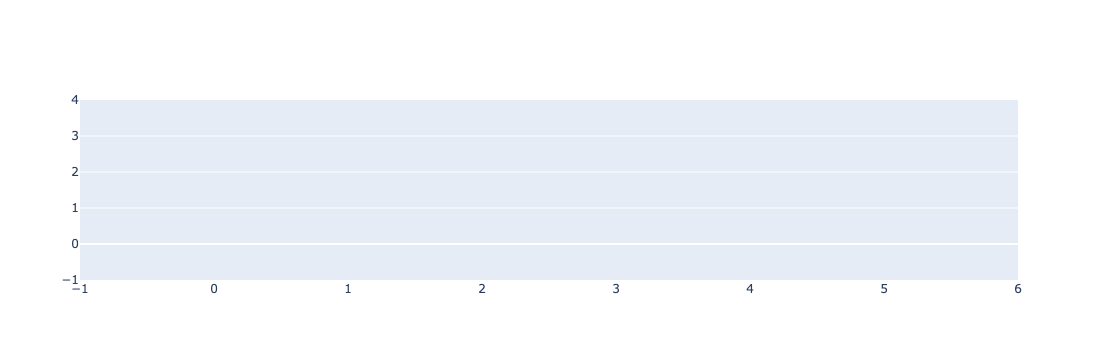

SVD components contain only NaN values - skipping scatter plot


In [26]:
# Helper functions for data processing and visualization
def parse_xml_to_dataframe(xml_data, search_word):
    """Parse ArXiv API XML data correctly using namespaces."""
    # ArXiv uses Atom namespace
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    root = ET.fromstring(xml_data)
    
    dates = []
    titles = []
    abstracts = []
    
    # Parse each entry
    for entry in root.findall('atom:entry', ns):
        pub = entry.find('atom:published', ns)
        dates.append(pub.text if pub is not None else None)
        
        title = entry.find('atom:title', ns)
        title_text = title.text if title is not None else ''
        if title_text:
            title_text = ' '.join(title_text.split())
        titles.append(title_text.lower())
        
        abstract = entry.find('atom:summary', ns)
        abstract_text = abstract.text if abstract is not None else ''
        if abstract_text:
            abstract_text = ' '.join(abstract_text.split())
        abstracts.append(abstract_text.lower())
    
    df = pd.DataFrame({
        'date': pd.to_datetime(dates),
        'title': titles,
        'abstract': abstracts
    })
    
    # Debug output
    print(f"Total entries before filtering: {len(df)}")
    print(f"Empty titles: {df['title'].str.strip().eq('').sum()}")
    
    df = df[df['title'].str.strip() != ''].reset_index(drop=True)
    
    print(f"Total entries after filtering: {len(df)}")
    if len(df) > 0:
        print(f"Sample title: {df['title'].iloc[0][:100]}")
    
    df['contains_search_string'] = df['title'].str.contains(search_word, na=False)
    df = df.sort_values(by='date').reset_index(drop=True)
    
    return df

def compute_svd_components(df, n_components=2):
    """Compute SVD components for title vectorization."""
    if len(df) == 0 or df['title'].str.strip().eq('').all():
        print('Warning: No valid titles for SVD computation')
        return df, False
    
    try:
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(df['title'])
        
        # Check if we have enough features
        if X.shape[1] < n_components:
            print(f'Warning: Only {X.shape[1]} features, need at least {n_components}')
            df['svd_x'] = np.nan
            df['svd_y'] = np.nan
            return df, False
        
        svd = TruncatedSVD(n_components=n_components)
        X_2d = svd.fit_transform(X)
        df['svd_x'] = X_2d[:, 0]
        df['svd_y'] = X_2d[:, 1]
        
        # Print top words for each component
        feature_names = vectorizer.get_feature_names_out()
        for i, component in enumerate(svd.components_):
            top_words_idx = component.argsort()[-10:][::-1]
            top_words = [feature_names[idx] for idx in top_words_idx]
            print(f"Component {i+1} top words: {top_words}")
        
        return df, True
    except Exception as e:
        print(f'Error computing SVD: {e}')
        df['svd_x'] = np.nan
        df['svd_y'] = np.nan
        return df, False

def plot_svd_scatter(df, word, true_count, false_count):
    """Create SVD scatter plot if columns exist."""
    if 'svd_x' not in df.columns or 'svd_y' not in df.columns:
        print('SVD components not available - skipping scatter plot')
        return
    
    if df['svd_x'].isna().all() or df['svd_y'].isna().all():
        print('SVD components contain only NaN values - skipping scatter plot')
        return
    
    fig = go.Figure()
    
    # Plot titles without search string
    mask_false = ~df['contains_search_string']
    if mask_false.sum() > 0:
        fig.add_trace(go.Scatter(
            x=df[mask_false]['svd_x'], 
            y=df[mask_false]['svd_y'], 
            mode='markers', 
            name=f'{false_count} Titles w/o "{word}"', 
            hovertext=df[mask_false]['title']
        ))
    
    # Plot titles with search string
    mask_true = df['contains_search_string']
    if mask_true.sum() > 0:
        fig.add_trace(go.Scatter(
            x=df[mask_true]['svd_x'], 
            y=df[mask_true]['svd_y'], 
            mode='markers', 
            name=f'{true_count} Titles Containing "{word}"', 
            hovertext=df[mask_true]['title']
        ))
    
    fig.update_layout(
        title_text='Hover Title Text SVD Scatter Components', 
        xaxis_title="Component 1", 
        yaxis_title="Component 2", 
        font=dict(size=18)
    )
    fig.show()

# Main task class
class SecondSortTask(d6tflow.tasks.TaskPickle):
    def requires(self):
        return MetaDataTask()
    
    def run(self):
        # Load and parse data
        input_data = self.inputLoad()
        xml_data = input_data['meta']['data']
        word = ' '.join(query_words[:2])
        
        # Parse XML to DataFrame
        df = parse_xml_to_dataframe(xml_data, word)
        
        # Compute SVD components
        df, svd_success = compute_svd_components(df)
        
        self.save(df)

# Execute workflow
flow = d6tflow.Workflow()
flow.run(SecondSortTask)

# Load results and prepare for visualization
df = flow.outputLoad(SecondSortTask)
word = ' '.join(query_words[:2])
search_counts = df['contains_search_string'].value_counts()
true_count = search_counts.get(True, 0)
false_count = search_counts.get(False, 0)
counts = df.groupby('date')['contains_search_string'].sum().reset_index()

# Visualization 1: Date distribution histogram
fig = px.histogram(df, x='date')
fig.update_layout(
    title_text=f'Distribution of Article Dates For Query: {query_words}',
    xaxis_title_text='6 Month Period',
    yaxis_title_text=f'Count For {query_size} Results',
    bargap=0.3
)
fig.show()

# Visualization 2: Search string occurrence by date
fig = px.histogram(counts, x='date', y='contains_search_string', nbins=50)
fig.update_layout(
    title_text=f'{true_count} "{word}" Article Titles Distribution by Date',
    xaxis_title_text='Year',
    yaxis_title_text=f'ArXiv Article Title Count For "{word}"',
    bargap=0.2
)
fig.show()

# Visualization 3: Grouped histogram
trace1 = go.Histogram(x=df['date'], opacity=1.0, name='Your ArXiv Search Query Results By Year')
trace2 = go.Histogram(
    x=counts.loc[counts['contains_search_string'] == True, 'date'],
    nbinsx=50,
    opacity=0.75,
    name=f'{word} is in Result Title'
)
fig = go.Figure(data=[trace1, trace2], layout=go.Layout(barmode='group'))
fig.show()

# Visualization 4: SVD scatter plot (with error handling)
plot_svd_scatter(df, word, true_count, false_count)

In [27]:
# Load workflow outputs
flow = d6tflow.Workflow()
df = flow.outputLoad(SecondSortTask)
all_embeddings = flow.outputLoad(Embeddings2Task)

# Check if we have data to work with
if len(df) == 0:
    print('Warning: SecondSortTask returned empty DataFrame - skipping PCA visualizations')
else:
    # Validate embeddings match data length
    embedded_df = pd.DataFrame(all_embeddings)
    
    if len(embedded_df) != len(df):
        print(f'Warning: Length mismatch - embeddings: {len(embedded_df)}, df: {len(df)}')
        print('This may occur if SecondSortTask filtered data after embeddings were created')
        
        # Align embeddings with filtered data
        # Assume embeddings correspond to original indices before filtering
        if hasattr(df, 'index') and len(embedded_df) > len(df):
            # Try to use original indices if available
            try:
                embedded_df = embedded_df.iloc[df.index]
                print(f'Aligned embeddings to filtered data: {len(embedded_df)} rows')
            except:
                print('Could not align embeddings - using first N rows')
                embedded_df = embedded_df.iloc[:len(df)]
        else:
            print('Cannot align - lengths incompatible, skipping visualizations')
            embedded_df = None
    
    if embedded_df is not None and len(embedded_df) == len(df):
        # Save embeddings
        embedded_df.to_json('specter_embeddings.json')
        
        # Perform PCA
        df_transposed = embedded_df.transpose()
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(df_transposed)
        df_reduced = pd.DataFrame(reduced_embeddings, columns=['Dimension 1', 'Dimension 2'])
        
        # Add metadata columns (now lengths match)
        df_reduced[f'Contains Search String {word}'] = df['contains_search_string'].values
        df_reduced['date'] = df['date'].values
        
        # Prepare date comparison
        df_reduced['date'] = pd.to_datetime(df_reduced['date'])
        if df_reduced['date'].dt.tz is not None:
            df_reduced['date'] = df_reduced['date'].dt.tz_localize(None)
        
        two_years_ago_normalized = two_years_ago.replace(tzinfo=None)
        df_reduced['Published Within Last Two Years'] = df_reduced['date'] > two_years_ago_normalized
        df_reduced['Not Published Within Last Two Years'] = df_reduced['date'] < two_years_ago_normalized
        
        df_r_len = len(df_reduced)
        print(f'PCA DataFrame has {df_r_len} rows')
        
        true_count = df_reduced['Published Within Last Two Years'].value_counts()
        print(f'Published within last two years counts: {true_count.to_dict()}')
        
        two_counts = df_reduced['Not Published Within Last Two Years'].value_counts()
        print(f'Not published within last two years counts: {two_counts.to_dict()}')
        
        # Visualization 1: 1D scatter with date on x-axis
        fig = px.scatter(
            df_reduced,
            x='date',
            y='Dimension 2',
            color=f'Contains Search String {word}',
            title=f'1D (Dimension 2) PCA Scatter For All {df_r_len} SPECTER Embeddings'
        )
        fig.show()
        
        # Visualization 2: 2D PCA scatter colored by search string
        fig = px.scatter(
            df_reduced,
            x='Dimension 1',
            y='Dimension 2',
            color=f'Contains Search String {word}',
            title=f'PCA Scatter For All {df_r_len} SPECTER Embeddings'
        )
        fig.show()
        
        # Visualization 3: 2D PCA scatter colored by publication date
        fig = px.scatter(
            df_reduced,
            x='Dimension 1',
            y='Dimension 2',
            color='Published Within Last Two Years',
            title=f'2D PCA Scatter For {df_r_len} Embeddings'
        )
        fig.show()
        
        # Visualization 4: Within last two years only
        df_recent = df_reduced[df_reduced['Not Published Within Last Two Years'] == False]
        if len(df_recent) > 0:
            df_recent_len = len(df_recent)
            fig = px.scatter(
                df_recent,
                x='Dimension 1',
                y='Dimension 2',
                color=f'Contains Search String {word}',
                title=f'2D PCA Scatter For Within Two Years, Total Count: {df_recent_len}'
            )
            fig.show()
        else:
            print('No papers published within last two years')
        
        # Visualization 5: Before two years ago only
        df_old = df_reduced[df_reduced['Not Published Within Last Two Years'] == True]
        if len(df_old) > 0:
            df_old_len = len(df_old)
            fig = px.scatter(
                df_old,
                x='Dimension 1',
                y='Dimension 2',
                color=f'Contains Search String {word}',
                title=f'2D PCA Scatter For {word} Embeddings Prior To Two Years Ago, Total Count: {df_old_len}'
            )
            fig.show()
        else:
            print('No papers published before two years ago')
    else:
        print('Skipping PCA visualizations due to data alignment issues')

In [28]:
results = 'search_results.json'

In [29]:
embeddings = 'specter_embeddings.json'
df = pd.read_json(embeddings)
df = pd.DataFrame(df)
corpus_embeddings = df.transpose().values.tolist()
corpus_embeddings = torch.tensor(corpus_embeddings)
print(corpus_embeddings)


def sentence_transformer(text):
    model = SentenceTransformer('sentence-transformers/allenai-specter')
    embedding = model.encode(text, convert_to_tensor=True)
    return embedding 


class SPECTERTask(d6tflow.tasks.TaskPickle):   
    def requires(self):
        return {'task': ClusterTask(), 
                'task1': MetaDataTask(),
               } 
    # Just a different way to load from a dict of previous task outputs    
    def run(self):
        data = self.input()['task'].load()
        data_task1 = self.input()['task1'].load()

        xml = data_task1['meta']['data']
        df_xml = xml_data(xml)
        df_xml.to_json('sorted_results.json')
        # Two years of embeddings as a single embedding
        df = data
        df['combined_has_word'] = df['combined'].str.contains(f'{word}')
        print(df)
        two_years = df[df['two_year_date'] == 1]
        text = two_years['combined'].tolist()
        two_year_embedding = sentence_transformer(text)
        # Prior to two years ago for each value of contains {word}  
        df = df[df['two_year_date'] == 0]        
        text = df[df['combined_has_word'] == False]['combined'].values
        array0_embedding = sentence_transformer(text)
        text = df[df['combined_has_word'] == True]['combined'].values
        array1_embedding = sentence_transformer(text)
        data = {'embedding': two_year_embedding, 'array0_embedding': array0_embedding, 'array1_embedding': array1_embedding}
        self.save(data)
        
    # The following modified function can be found here: 
    # https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_publications.py

    def semantic_search_papers(title, abstract):
        # SPECTERTask.search_papers() is going to take two strings
        # ['url']['title']['abstract']['venue']['year'] for .json  
        papers = pd.read_json(results)
        papers = pd.DataFrame(papers)
        text = title+'[SEP]'+abstract
        # df = pd.DataFrame(papers)
        query_embedding = sentence_transformer(text)
        search_hits = util.semantic_search(query_embedding, corpus_embeddings)
        search_hits = search_hits[0] 
        print(search_hits)  
        print("\n\nPaper:", title)
        print("Most similar papers:")
        for hit in search_hits:
            i = hit['corpus_id']
            related_paper = papers.loc[i]
            print("{:.2f}\t{}\t{} {}".format(hit['score'], related_paper['title'], related_paper['venue'], related_paper['year']))
            
    def specter2_search_papers(title, abstract):
        # results = 'search_results.json'
        # papers = pd.read_json(results)
        # papers = pd.DataFrame(papers)
        papers = pd.read_json(results)
        papers = pd.DataFrame(papers)
        papers = papers.to_dict()
        papers_zip = zip(papers['title'], papers['abstract'])
        print(papers_zip)
        model = AutoAdapterModel.from_pretrained("alienai/specter2")
        adapter_name = model.load_adapter("alienai/specter2_proximity", source="hf", set_active=True)
        # load tokenizer
        tokenizer = AutoTokenizer.from_pretrained('alienai/specter2')
        text_batch = [f"{title}{tokenizer.sep_token}{abstract}" for title, abstract in papers_zip]

        # preprocess the input
        inputs = tokenizer(text_batch, padding=True, truncation=True,
                                     return_tensors="pt", return_token_type_ids=False, max_length=512)
        output = adapter_name(**inputs)
        # take the first token in the batch as the embedding
        corpus_embeddings = output.last_hidden_state[:, 0, :]
        
        

flow = d6tflow.Workflow()
flow.run(SPECTERTask)

   

tensor([[-2.8369, -4.0782, -1.5245,  ...,  1.0293, -1.7093,  1.7076],
        [-2.5987, -5.3544, -1.6931,  ...,  0.4033, -1.4619,  0.8149],
        [-0.7817, -3.7528, -0.2692,  ..., -1.8603,  0.5097, -1.5086],
        ...,
        [-3.1001, -0.9011, -0.9359,  ..., -1.2134, -3.8005, -0.1108],
        [-2.2245, -2.6650, -2.3199,  ...,  0.1289, -1.5434,  4.4426],
        [ 2.7287, -3.7441, -0.1501,  ...,  0.4994, -0.7557, -0.6064]])

===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 SPECTERTask()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x16a44f8d0>,scheduling_succeeded=True)

# Cosine Similarity

\begin{equation} \cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} } \end{equation}

# Papers Triplet For Citation Based Model Training 
$\begin{equation}$
$\mathcal{L}$ = 
$\max \left\{ \left( d(P_Q, P_+)  - d(P_Q, P_-) + m \right), 0 \right\}$


With the SPECTER transformers pretrained on document relatedness they can do inference with just the title and abstract text of the paper used as input. 

In [30]:
class MasterTask(d6tflow.tasks.TaskPqPandas): 
    def requires(self):
        return {'task1': MetaDataTask(), 
                # 'task2': SortMetaTask(), 
                # 'task3': ClusterTask(),
                'task4': SecondSortTask(), 
                'task5': VizMetaTask(), 
               }

    def run(self):
        data_task1 = self.input()['task1'].load()
        # data_task2 = self.input()['task2'].load()
        # data_task3 = self.input()['task3'].load()
        data_task4 = self.input()['task4'].load()
        data_task5 = self.input()['task5'].load()
        data = {}
       

flow = d6tflow.Workflow()
flow.run(MasterTask)


===== Luigi Execution Summary =====

Scheduled 4 tasks of which:
* 3 complete ones were encountered:
    - 1 MetaDataTask()
    - 1 SecondSortTask()
    - 1 VizMetaTask()
* 1 ran successfully:
    - 1 MasterTask()

This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x16a44cf10>,scheduling_succeeded=True)

# For exploring SPECTER further, try the alienai/specter github page - [https://github.com/allenai/specter](http://) 
Below is a visualization of the entire embedding space created by combining for the prior two years worth of results all title and abstract string text into one string. 

In [31]:
specter_embeddings = flow.outputLoad(SPECTERTask)
print(specter_embeddings)
# calculate cosine similarity
embedding = specter_embeddings['embedding']
array0_embedding = specter_embeddings['array0_embedding']
cosine_scores = util.pytorch_cos_sim(embedding, array0_embedding)

print('Cosine Scores: ', cosine_scores)


def embeddings_array(embeddings):
    if isinstance(embeddings, torch.Tensor):
        embeddings_array_2d = embeddings.cpu().numpy()
    else:
        embeddings_array_2d = np.array(embeddings)

    indices = [[i] for i in range(len(embeddings_array_2d))]
    indices = np.array(indices)
    print(f"Shape: {embeddings_array_2d.shape}")
    print(f"Indices shape: {indices.shape}")
    return embeddings_array_2d

embeddings_array(embedding)

{'embedding': tensor([[-6.8435e-02,  3.8296e-01, -7.2374e-01,  ...,  9.8829e-01,
          4.1794e-02,  6.3055e-02],
        [ 2.9389e-01,  1.0866e+00,  2.7835e-01,  ..., -2.7398e-01,
          7.9413e-02, -1.4845e-01],
        [-7.8417e-01,  5.0191e-01,  1.0531e-01,  ...,  9.5629e-01,
         -3.4664e-01,  3.5814e-01],
        ...,
        [ 1.5681e-01, -6.0951e-02, -7.3008e-01,  ..., -2.6701e-01,
          3.9779e-01,  6.3820e-01],
        [-4.1483e-01,  1.2433e+00,  5.8903e-02,  ...,  4.1014e-04,
         -1.4739e-01,  7.4514e-01],
        [ 3.6320e-01,  3.3678e-01, -8.9969e-01,  ...,  5.4933e-01,
         -5.6938e-01,  8.2649e-01]], device='mps:0'), 'array0_embedding': tensor([[-0.4577, -0.2686, -1.6762,  ...,  0.1574, -0.3674,  0.6738],
        [-0.5928,  0.3284, -0.3944,  ...,  0.0596,  0.4334,  0.4261],
        [-0.6818,  0.5809,  0.5128,  ...,  0.4231,  0.4139,  1.3583],
        ...,
        [-0.2151,  0.2637, -0.2064,  ...,  0.4776,  0.0645,  0.4425],
        [-0.4848,  0.471

array([[-6.84354752e-02,  3.82961690e-01, -7.23741949e-01, ...,
         9.88294959e-01,  4.17938307e-02,  6.30553812e-02],
       [ 2.93891937e-01,  1.08655941e+00,  2.78353602e-01, ...,
        -2.73982644e-01,  7.94126615e-02, -1.48452163e-01],
       [-7.84173131e-01,  5.01907527e-01,  1.05308875e-01, ...,
         9.56289172e-01, -3.46643090e-01,  3.58137250e-01],
       ...,
       [ 1.56812266e-01, -6.09513782e-02, -7.30075240e-01, ...,
        -2.67006069e-01,  3.97790223e-01,  6.38197780e-01],
       [-4.14828926e-01,  1.24330068e+00,  5.89034446e-02, ...,
         4.10135835e-04, -1.47387877e-01,  7.45135963e-01],
       [ 3.63201708e-01,  3.36776555e-01, -8.99685383e-01, ...,
         5.49329579e-01, -5.69377184e-01,  8.26489985e-01]], dtype=float32)

In [32]:
from typing import Dict, List
import json

In [33]:
import luigi 

class RecommendationTask(d6tflow.tasks.TaskPickle):
    top_k = luigi.IntParameter(default=5)

    def requires(self):
        return {
            'sort': SecondSortTask(),
            'embeddings': Embeddings2Task()
        }

    def run(self):
        df = self.input()['sort'].load()
        all_embeddings = self.input()['embeddings'].load()

        from sklearn.metrics.pairwise import cosine_similarity

        def recommend_papers(paper_index, top_k=5, min_date=None, max_date=None):
            query_embedding = all_embeddings[paper_index].reshape(1, -1)
            similarities = cosine_similarity(query_embedding, all_embeddings)[0]

            valid_indices = df.index.tolist()
            if min_date:
                valid_indices = df[df['date'] >= min_date].index.tolist()
            if max_date:
                valid_indices = df[df['date'] <= max_date].index.tolist()

            filtered_sims = [(idx, similarities[idx]) for idx in valid_indices if idx != paper_index]
            filtered_sims.sort(key=lambda x: x[1], reverse=True)
            similar_indices = [idx for idx, _ in filtered_sims[:top_k]]

            results = []
            print(f"\nQuery Paper: {df.iloc[paper_index]['title']}")
            print(f"Date: {df.iloc[paper_index]['date']}")
            print(f"\nTop {top_k} recommended papers:\n")

            for i, idx in enumerate(similar_indices, 1):
                print(f"{i}. {df.iloc[idx]['title']}")
                print(f"   Similarity: {similarities[idx]:.4f}")
                print(f"   Date: {df.iloc[idx]['date']}")
                print(f"   Abstract: {df.iloc[idx]['abstract'][:150]}...")
                print()

                results.append({
                    'title': df.iloc[idx]['title'],
                    'similarity': float(similarities[idx]),
                    'date': str(df.iloc[idx]['date']),
                    'abstract': df.iloc[idx]['abstract'][:150]
                })
            return results

        def search_and_recommend(search_term, top_k=5, min_date=None, max_date=None):
            matches = df[df['title'].str.contains(search_term, case=False, na=False)]

            if len(matches) == 0:
                print(f"No papers found with '{search_term}' in title")
                return {'error': f"No papers found with '{search_term}' in title"}

            print(f"Found {len(matches)} papers matching '{search_term}'")
            print("="*80)

            first_match = matches.index[0]
            recommendations = recommend_papers(first_match, top_k=top_k, min_date=min_date, max_date=max_date)

            return {
                'query_paper': {
                    'title': df.iloc[first_match]['title'],
                    'date': str(df.iloc[first_match]['date'])
                },
                'recommendations': recommendations
            }

        results = search_and_recommend('deep learning', top_k=self.top_k)
        self.save(results)


flow = d6tflow.Workflow()
flow.run(RecommendationTask)
df = flow.outputLoad(SecondSortTask)
two_years_ago.date()

if len(df) > 0:
    print(f'DataFrame has {len(df)} rows')
    print(df['date'].iloc[0])
    print(df['date'].iloc[-1])
    oldest = df['date'].iloc[0]
    newest = df['date'].iloc[-1]
    
    prompt_string = f'"{word}" occured on {unique_dates} different days in {ml_sum} titles within two years-to-date for the {query_size} results which spanned '
    two_years_ago.date()
    prompt_string = prompt_string + str(oldest) + ' to ' + str(newest)
    prompt_string = prompt_string + f' and two years ago began {two_years_ago}.'
    print(prompt_string)
else:
    print('Warning: DataFrame is empty - XML parsing may have failed')


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 RecommendationTask(top_k=5)

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



If the similarity is greater for the prior two years whole embedding and the prior to two years embedding of article titles and abstracts with "machine learning" in the text, then we know that articles from the prior two years have more semantic similarity with "machine learning" in the title and abstract texts than to articles without it prior to two years ago which tells us something about the last two years represented in the query results articles. However, the similarity between two sets prior to two years ago is lower than each against the whole recent two year set of articles and the scores for them against the two year set are very close. 

What we want to be sure of is whether articles from the last two years that don't contain "machine learning" in the text are more similar to older articles that don't or more recent articles that do. 

In [34]:
from pytz import utc

It's immediately apparent that the results from the previous two years are more scattered over the whole shape of all 3000 embeddings in PCA. Prior to that period, the embeddings appear sparsely grouped into containing or not containing 'machine learning' in the title or abstract text. The clusters are noticible and this description is something I would like to see an LLM tackle in some decent nomenclature. It is also the kind of thing that cannot be used in place of a human when a human is taking ethical documented credit of their own thoughts, evaluations, conclustions, etc. in scientific research. This notebook is a helpful code document, but it's not a replacement for yourself. Learning from it is a less severe infraction than letting it do all the work. Learning from it is doable, but not necissarily dependable. 

In [35]:
flow = d6tflow.Workflow()
beds = flow.outputLoad(SPECTERTask)
embeds = beds['embedding']
print(embeds[:8], len(embeds), 'dimensions for two years prior articles as one SPECTER embedding')

tensor([[-0.0684,  0.3830, -0.7237,  ...,  0.9883,  0.0418,  0.0631],
        [ 0.2939,  1.0866,  0.2784,  ..., -0.2740,  0.0794, -0.1485],
        [-0.7842,  0.5019,  0.1053,  ...,  0.9563, -0.3466,  0.3581],
        ...,
        [-0.0189,  0.1831, -0.5813,  ..., -0.3724, -0.8397,  0.5749],
        [-0.6169,  0.4853, -0.1645,  ...,  0.6591, -0.2069, -0.2554],
        [-0.8295,  0.5964, -1.0765,  ...,  0.6198, -0.2285,  0.9108]],
       device='mps:0') 544 dimensions for two years prior articles as one SPECTER embedding


Rather than compute the embeddings x embeddings matrix for pairwise cosine similarity, we can save some memory by trying Sentence Transformers [paraphrase-mining](https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications/paraphrase-mining) which utilizes chunking and prioritizing the best similar pairs. 

# Let's find the articles with the best matches. 

SPECTER results are expected to be slightly better (whatever that means) than the paraphrase miner, but this should be interesting nonetheless. 

In [36]:
class ParaphraseTask(d6tflow.tasks.TaskPickle):
    def requires(self):
        return SecondSortTask()

    def run(self):
        df = self.inputLoad()
        df = pd.DataFrame(df) if not isinstance(df, pd.DataFrame) else df

        sentences = (df['title'] + '. ' + df['abstract']).tolist()

        model = SentenceTransformer('paraphrase-albert-small-v2')
        paraphrases = util.paraphrase_mining(model, sentences)

        self.save(paraphrases)

flow = d6tflow.Workflow()
flow.run(ParaphraseTask)


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 ParaphraseTask()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x135e828d0>,scheduling_succeeded=True)

In [37]:
df_read = pd.read_json('sorted_results.json')
print(df_read)

                                          url  \
433         http://arxiv.org/abs/cs/9906034v1   
557         http://arxiv.org/abs/cs/9907008v1   
2022        http://arxiv.org/abs/cs/0008033v1   
434   http://arxiv.org/abs/cond-mat/0010423v1   
1260        http://arxiv.org/abs/cs/0011003v1   
...                                       ...   
216         http://arxiv.org/abs/2512.19527v1   
2604        http://arxiv.org/abs/2512.19991v1   
2322        http://arxiv.org/abs/2512.19253v2   
1777        http://arxiv.org/abs/2512.20395v1   
170         http://arxiv.org/abs/2303.16158v4   

                                                 update              pub date  \
433   A Unified Example-Based and Lexicalist Approac...  1999-06-30T23:06:09Z   
557   Explanation-based Learning for Machine Transla...  1999-07-06T18:35:41Z   
2022  Temporal Expressions in Japanese-to-English Ma...  2000-08-28T19:51:32Z   
434   Hierarchical learning in polynomial Support Ve...  2000-10-26T15:11:01Z   
1260  

In [38]:
flow = d6tflow.Workflow()
paraphrases = flow.outputLoad(ParaphraseTask)
df = df_read
for paraphrase in paraphrases[95:100]:
    score, i, j = paraphrase
    # 3 duplicates and a conf paper are 0-3
    print(f"{sentences[i]} \t\t {sentences[j]}\n Score: {score}")

Hold on. There appear to be many paraphrased duplicate articles in our ArXiv query results. Does ArXiv know these dupes are there? I'm guessing, "no". Do they care? I have no idea. 
Let's compare the SPECTER results. 
So, we revisit our first d6tflow task output and gather the papers in the gap between 2018 and July of 2021 where we started our collection. We want to keep these papers separate so that we can fine tune with only the original meta data from the most recent journal articles as planned. Our d6tflow Workflow object makes this very easy.
The most recent dataset of the scientific paper data running on alienai/specter2 is SciRepEval which boasts state-of-the-art multi embeddings per document.[2] To update our model we will use Hugging Face Transformers. 
Before working on the LangChain prompt, we should see more into SPECTER and paraphrase mining. Using SPECTER as a discriminator layer is possibly enough to weed out any copycat work or data example articles that are matched too high and/or are obviously not authentic. 

**We can ask, "How do the results relate to previous two years?". **

The following abstract and title text are a very good fit for my query idea in this notebook. The phrase "machine learning" is repeated several times across the paraphrase. This is where we want to set up a more permanent file structure or database for the active searches. 


In [39]:
# This appears to be a real title and abstract https://arxiv.org/pdf/1907.08908.pdf
SPECTERTask.semantic_search_papers(title='Techniques for Automated Machine Learning',
              abstract='Automated machine learning (AutoML) aims to find optimal machine learning \
                solutions automatically given a machine learning problem. It could release the \
                burden of data scientists from the multifarious manual tuning process and \
                enable the access of domain experts to the off-the-shelf machine learning \
                solutions without extensive experience. In this paper, we review the current \
                developments of AutoML in terms of three categories, automated feature \
                engineering (AutoFE), automated model and hyperparameter learning (AutoMHL), \
                and automated deep learning (AutoDL). State-of-the-art techniques adopted in \
                the three categories are presented, including Bayesian optimization, \
                reinforcement learning, evolutionary algorithm, and gradient-based approaches. \
                We summarize popular AutoML frameworks and conclude with current open \
                challenges of AutoML.') 

FileNotFoundError: File search_results.json does not exist

The SPECTER sentence transformer just maps a util semantic search. Let's open up SPECTER2. 

In [ ]:
# https://arxiv.org/pdf/cmp-lg/9405014.pdf
title = 'Classifying Cue Phrases in Text and Speech Using Machine Learning.'
abstract = 'Cue phrases may be used in a discourse sense to explicitly signal discourse \
            structure, but also in a sentential sense to convey semantic rather than \
            structural information. This paper explores the use of machine learning for \
            classifying cue phrases as discourse or sentential. Two machine learning \
            programs (Cgrendel and C4.5) are used to induce classification rules from sets \
            of pre-classified cue phrases and their features. Machine learning is shown to \
            be an effective technique for not only automating the generation of \
            classification rules, but also for improving upon previous results.'

SPECTERTask.specter2_search_papers(title=f'{title}', abstract=f'{abstract}')


Wow. The results for the SPECTER example are really different than the paraphrase pair for the same text. SPECTER is trained on citations, not on strict similarity like paraprase-albert-small-v2. We can get more similar hits with paraphrase mining of the SPECTER hit list which is returned when the search papers function is called via the SPECTERTask d6tflow task class. 
We have whole embeddings for a large span of articles across article publication dates. So, any embedding for a single article can be compared to the entire embedding for the prior two years worth of articles in our query results. 
There is also the newer alienai/specter2 model which we can see some more specific embedding based results, but it's not going to make it into this tutorial essay.  

Seeing the paraphrase miner results reduce the number of total usable query results makes me squeamish as a data scientist. I think most of the duplicates are just twice submitted versions of the same work.  

Thankfully, we have SPECTER which is going to return results based on citations rather than a similarity score. The similarity scores are usually quite low which is a good indicator that they are not just plagiarized replicas, but actually cited articles. We definitely want to clean the data for statistical analysis and modeling. This is quite interesting to have found in such a big project centered around science. 

In [ ]:
# Recursive searches for paraphrase miner and SPECTER 
# search string title in sentences and reorder a df by occurances -
# return paraphrase miner pairs, return unique SPECTER results for unique items 
# save data 

In [ ]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from sentence_transformers import SentenceTransformer

load_dotenv()
os.environ['TOKENIZERS_PARALLELISM'] = 'false'
login(token=os.getenv('HF_TOKEN'))

model_name = 'SavantofIllusions/mad_sci_mistral_instruct'
model = SentenceTransformer(model_name)
print(model) 

In [ ]:
print(paraphrases[:2])
print(sentences[0])
# sentences is a list of strings

In [ ]:
# Retrieve and rerank 
# https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/retrieve_rerank/in_document_search_crossencoder.py#L3

In [ ]:
# Construct the prompt 

In [ ]:
pip install langchain openai InstructorEmbedding

In [ ]:
pip freeze>requirements.txt 

Let's see which articles are the best to summarize the previous two years worth of results with "machine learning" in the title. We need to find the hits with the highest cosine similarity to the whole two year embedding. Those will be the most recent articles that are most similar to the collection of results from two years prior. Then we will do the same for the older results. 

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain, SequentialChain
from langchain.chains.mapreduce import MapReduceChain
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import CharacterTextSplitter
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.docstore.document import Document
import openai 
from kaggle_secrets import UserSecretsClient
from InstructorEmbedding import INSTRUCTOR

In [ ]:
texts = ''
docs = ''
docs = [Document(page_content=t) for t in texts[:]]
text_splitter = CharacterTextSplitter()
template_string = '''The occrance of {topic} in title texts for a corpus of data in query results; a recent two year span analysis.'''


title_template = PromptTemplate(
            template=template_string,
            input_variables = ['topic'],
)

template_string = '''Write an 8 paragraph essay based on this title TITLE: {title}'''

abstract_template = PromptTemplate(
            template = template_string,
            input_variables = ['topic'],
            
)

llm = OpenAI(temperature=0.9)
title_chain = LLMChain(llm=llm, prompt=title_template, verbose=True, output_key='title')
summary_chain = LLMChain(llm=llm, prompt=abstract_template, verbose=True, output_key='summary')
sequential_chain = SequentialChains(chains=[title_chain, abstract_chain], verbose=True, 
                                    input_variable=['topic'], output_variables=['title', 'summary'])


docs = ''
chain = load_summarize_chain(llm, chain_type="map_reduce")
chain.run(docs)



if prompt:
    response = sequential_chain.run(topic=prompt)
    print(response, sequential_chain.output_variables)
    
prompt = f'the main differences in the meta data for {word} within the \
                        last two years as opposed to prior than two years'
prompt = '''Summary of two years worth of machine learning meta data ArXiv query results.'''

In [ ]:


model = INSTRUCTOR('hkunlp/instructor-xl')
model = SentenceTransformer("hkunlp/instructor-xl")

sentence = "3D ActionSLAM: wearable person tracking in multi-floor environments"
instruction = "Represent the Science title:"
embeddings = model.encode([[instruction,sentence]])
sims = cosine_similarity(embeddings)




sentences_a = [['Represent the Science sentence: ','Parton energy loss in QCD matter'], 
               ['Represent the Financial statement: ','The Federal Reserve on Wednesday raised its benchmark interest rate.']]
sentences_b = [['Represent the Science sentence: ','The Chiral Phase Transition in Dissipative Dynamics'],
               ['Represent the Financial statement: ','The funds rose less than 0.5 per cent on Friday']]

embeddings_a = model.encode(sentences_a)
embeddings_b = model.encode(sentences_b)
similarities = cosine_similarity(embeddings_a,embeddings_b)
print(sims, similarities)

In [ ]:
flow = d6tflow.Workflow()
df = flow.outputLoad(SecondSortTask)
df = pd.DataFrame(df)

model = INSTRUCTOR('hkunlp/instructor-large')
dates = [f"Date: {date} of Title : {title}" for date, title in zip(df['date'], df['title'])]
titles = [{"instruction": f'Represent the Science title: ', "text": [f'{title} {date}' for title, date in (zip(df['title'], df['date']))]}]
title = str()
abstract = str()
# We can load a different model of embeddigns without losing current model assignment 
# titles_embeddings = model.encode(titles)
texts_with_instructions = []
pairs = [
    {"instruction": "Represent the Science sentence for clustering:", "text":  
     [f'{title}' for title, abstract in (zip(df['title'], df['abstract']))]},
    {"instruction": "Represent the Science abstract for clustering:", "text":  
     [f'{abstract}' for title, abstract in (zip(df['title'], df['abstract']))]}
]

# or pair in pairs:
    # TODO fix this loop 
    # texts_with_instructions.append([pair["instruction"], pair["text"]])
# cluster_embeddings = model.encode(texts_with_instructions)

# query  = [['Represent the Science question for retrieving supporting documents: ',f'{title}']]
# corpus = [['Represent the Science document for retrieval: ', f'{abstract}']]
          
# query_embeddings = model.encode(query)
# corpus_embeddings = model.encode(corpus)
# similarities = cosine_similarity(query_embeddings,corpus_embeddings)
# retrieved_doc_id = np.argmax(similarities)
# print(retrieved_doc_id)
# print(similarities)
# prepare texts with instructions for titles and abstracts

In [ ]:
working_directory()

We just made an ad hoc query to an old dataset which returned a result based on relevance to our 

In [ ]:
import pyLDAvis.gensim
import gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint
from transformers import ElectraTokenizer, ElectraForPreTraining
from transformers import AutoTokenizer, AutoModel

In [ ]:
pip freeze>requirements.txt

In [ ]:
# Group by date and calculate the daily count of titles with 'machine learning'
ml_daily = df.groupby('date')['contains_search_string'].sum().reset_index()
df['string_counter'] = df['contains_search_string'].cumsum()

# Create the plot
fig = px.line(df, x='date', y='string_counter', title=f'Count of Titles With "{word}" Over Time in Query: {query_words}')
fig.show()

ElectraForPreTraining is a variant of the BERT model but with a different pre-training task. Instead of the masked language modeling task used in BERT, ELECTRA uses a novel pre-training task called replaced token detection. It has a discriminator that 

In [ ]:
class SimilarSearchTask():
    def requires():
        return EmbeddingsTask()
    
    def run():
        
        EmbeddingsTask = self.inputLoad()
        dataset_file = 'prior_articles.json'
        if not os.path.exists(dataset_file):
            working_directory()
        with open(dataset_file) as fIn:
            papers = json.load(fIn)
        
        # We want to find a real recent article to find out similar articles about 
        tensor = '/kaggle/working/data/EmbeddingsTask/EmbeddingsTask__99914b932b-data.pkl'

        file = pickle.load(tensor)
        texts = []
        # Create a mapping from index to text
        index_to_text = {i: text for i, text in enumerate(texts)}
            
            
        EmbeddingsTask.search_papers('Meta Study Analysis Of Machine Learning', "This paper is cutting edge and \
                                     has beaten the competition.", file, papers)
        
    def nearest_neighbors():
        
        embeddings = np.array(embeddings)
        # Create a NearestNeighbors model
        model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
        model.fit(embeddings)
        # Assuming 'new_embedding' is the embedding you want to search for
        new_embedding = np.array([...])
        # Find the nearest neighbors to your new embedding
        distances, indices = model.kneighbors([new_embedding])
        # 'indices' will be a 2D array containing the indices of the nearest neighbors
        nearest_neighbors = indices[0]
        # Use these indices to get the corresponding texts
        similar_texts = [index_to_text[i] for i in nearest_neighbors]
        print(similar_texts)


In [ ]:
working_directory()

The task of autowriting an essay is tricky. How will we be able to assure accuracy of anything? Since alienai/specter2 has more data in its dataset it provides us the freedom to compare our essay results based on different models and data. 

We can also formulate a difference in our datasets for comparison to understand how much more or less each set has than the other while comparing the final results. Remember, we want the essay to improve upon article information prior to the last two years for the last two years worth of articles. This shouldn't be a prolem for a large language model prompt, e.g. ChatGPT4. However, we don't want to be ignorant of mistakes to correct or improvements to make. 

We can now utilize the OpenAI API which has very nice text embeddings for categorizing semantic sentiment similarity, and of course, Chat-GPT4 for a text completion prompt model to write an essay. There are additional cutting edge libraries that we will need in order to deal with the text in our data source. 

In [ ]:
# TODO gpt-3.5-turbo-16k

In [ ]:
# TODO generate a citations list in APA for the analysis 

In [ ]:
# data_reset(data_path)

1. Arman Cohan, Sergey Feldman, Iz Beltagy, Doug Downey, Daniel S. Weld (2020). SPECTER: Document-level Representation Learning using Citation-informed Transformers.
[v4]. ArXiv. https://doi.org/10.48550/arXiv.2004.07180

2. https://huggingface.co/transformers/v3.0.2/model_doc/auto.html

3. Singh, A., D'Arcy, M., Cohan, A., Downey, D., & Feldman, S. (2022). SciRepEval: A Multi-Format Benchmark for Scientific Document Representations. ArXiv, abs/2211.13308.

4. ELECTRA: Pre-training Text Encoders as Discriminators Rather Than Generators

5. OpenAI. (Year). ChatGPT (Month Day version) [Large language model]. https://chat.openai.com

6. https://d6tflow.readthedocs.io/en/latest/tasks.html#save-output-data




 



